<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/tensorflow2_keras_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow2教程-Keras函数式API
函数API是一种创建模型的方式，该方法比Sequential以下方法更加灵活：它可以处理具有非线性拓扑的模型，具有共享层的模型以及具有多个输入或输出的模型。

它基于以下思想：深度学习模型通常是层的有向无环图（DAG）。Functional API是一组用于构建层图的工具。

In [1]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


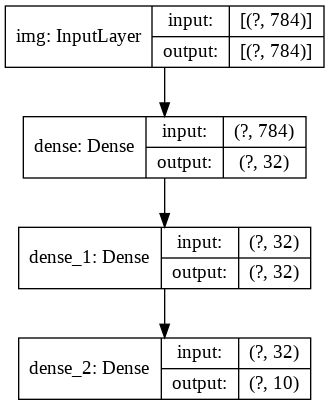

In [ ]:
#创建网络
inputs = tf.keras.Input(shape = (784,),name='img')
h1 = layers.Dense(32,activation='relu')(inputs)
h2 = layers.Dense(32,activation='relu')(h1)
outputs = layers.Dense(10,activation='softmax')(h2)

model = tf.keras.Model(inputs = inputs,outputs=outputs,name ='mnist_model')

model.summary()
keras.utils.plot_model(model,'mnist_model.png')
keras.utils.plot_model(model,'model.info.png',show_shapes=True)

In [ ]:
# 训练验证测试
# 模型的训练、验证和测试与训练模型完全相同
# 下面使用mnist数据集进行展示
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
#将数值归到0-1之间
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

Epoch 1/5
750/750 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8754 - val_loss: 0.2371 - val_accuracy: 0.9302
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.2209 - accuracy: 0.9357 - val_loss: 0.1917 - val_accuracy: 0.9450
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9476 - val_loss: 0.1672 - val_accuracy: 0.9522
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1531 - accuracy: 0.9551 - val_loss: 0.1490 - val_accuracy: 0.9582
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1355 - accuracy: 0.9605 - val_loss: 0.1465 - val_accuracy: 0.9584
test loss: 0.14253973960876465
test acc: 0.9578999876976013


In [ ]:
# 模型的保存与序列化与Sequential模型完全一样
model.save('model_save.h5')
del model


In [ ]:
del model

In [ ]:
model = keras.models.load_model('model_save.h5')
model.summary()

test_scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_scores = model.evaluate(x_test[:50], y_test[:50], verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

test loss: 0.07037844508886337
test acc: 0.10000000149011612


使用共享网络创建多个模型
在函数式API中，通过在图层网络中指定其输入和输出来创建模型。 这意味着可以使用单个图层图来生成多个模型

In [ ]:
#自编码器网络结构
#编码器
encode_input = keras.Input(shape=(28,28,1),name = 'img')
h1 = layers.Conv2D(16,3,activation='relu')(encode_input)
h1 = layers.Conv2D(32,3,activation='relu')(h1)
h1 = layers.MaxPool2D(3)(h1)
h1 = layers.Conv2D(32,3,activation='relu')(h1)
h1 = layers.Conv2D(16,3,activation='relu')(h1)
encode_output = layers.GlobalMaxPool2D()(h1)

encode_model = keras.Model(inputs = encode_input, outputs = encode_output, name='encoder')
encode_model.summary()

#解码器

h2 = layers.Reshape((4,4,1))(encode_output)
h2 = layers.Conv2DTranspose(16,3,activation='relu')(h2)
h2 = layers.Conv2DTranspose(32,3,activation='relu')(h2)
h2 = layers.UpSampling2D(3)(h2)
h2 = layers.Conv2DTranspose(16,3,activation='relu')(h2)
decode_output = layers.Conv2DTranspose(1,3,activation='relu')(h2)

autoencoder = keras.Model(inputs = encode_input, outputs = decode_output, name='autoencoder')

autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [ ]:
可以把整个模型，当作一层网络使用 我们可以通过在另一层的Input或Output上调用任何模型，将其视为层。请注意，通过调用模型，我们不仅可以重用模型的体系结构，还可以重用其权重。

下面是对自动编码器示例的另一种处理方式，该示例创建一个编码器模型，一个解码器模型，并将它们链接到两个调用中以获得自编码器模型：

In [ ]:
encode_input = keras.Input(shape=(28,28,1),name='src_img')
h1 = layers.Conv2D(16,3,activation='relu')(encode_input)
h1 = layers.Conv2D(32,3,activation='relu')(h1)
h1 = layers.MaxPool2D(3)(h1)
h1 = layers.Conv2D(32,3,activation='relu')(h1)
h1 = layers.Conv2D(16,3,activation='relu')(h1)
encode_output = layers.GlobalMaxPool2D()(h1)
encode_model = keras.Model(inputs = encode_input,outputs = encode_output,name='encoder')
encode_model.summary()

decode_input = keras.Input(shape=(16,),name = 'encoded_img')
h2 = layers.Reshape((4,4,1))(decode_input)
h2 = layers.Conv2DTranspose(16,3,activation='relu')(h2)
h2 = layers.Conv2DTranspose(32,3,activation='relu')(h2)
h2 = layers.UpSampling2D(3)(h2)
h2 = layers.Conv2DTranspose(16,3,activation='relu')(h2)
decode_output = layers.Conv2DTranspose(1,3,activation='relu')(h2)
decode_model = keras.Model(inputs = decode_input,outputs= decode_output,name='decoder')
decode_model.summary()

autoencoder_input = keras.Input(shape=(28,28,1),name='img')
h3 = encode_model(autoencoder_input)
autoencoder_output = decode_model(h3)
autoencoder = keras.Model(inputs = autoencoder_input,outputs = autoencoder_output,name = 'autoencoder')

autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
src_img (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 16)                0   


模型可以嵌套：模型可以包含子模型（因为模型就像一层一样）。

模型集成

模型嵌套的另一种常见模式是集成。以下是将一组模型整合为一个平均其预测值的模型的方法：

In [ ]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()
inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs, outputs)
ensemble_model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
functional_9 (Functional)       (None, 1)            129         input_8[0][0]                    
__________________________________________________________________________________________________
functional_11 (Functional)      (None, 1)            129         input_8[0][0]                    
__________________________________________________________________________________________________
functional_13 (Functional)      (None, 1)            129         input_8[0][0]                    
______________________________________________________________________________________

复杂网络结构构建
假设我们正在建立一个系统，用于按优先级对定制票进行排序并将其分配到正确的部门。

模型将具有3个输入：

票证标题（文本输入）
票证的文本正文（文本输入）
用户添加的所有标签（分类输入） 它将有两个输出：

优先级得分，介于0和1之间（标量S型输出）

应该处理票证的部门（softmax输出） 仅使用几行Functional API构建该模型。

In [ ]:
# 构建一个根据定制票标题、内容和标签，预测票证优先级和执行部门的网络
# 超参

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     128000      title[0][0]                      
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     128000      body[0][0]                       
______________________________________________________________________________________

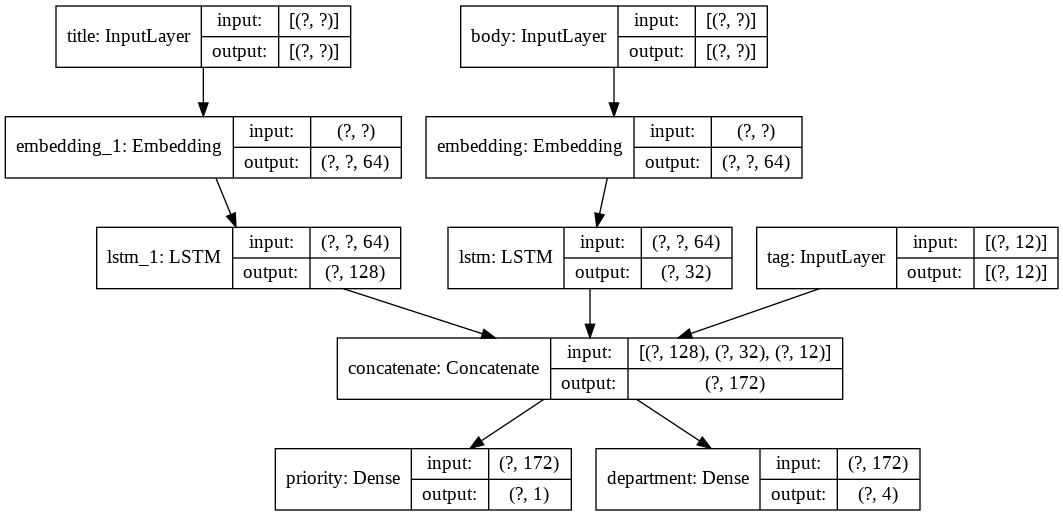

In [ ]:
num_words = 2000
num_tags = 12
num_departments = 4
#输入
body_input = keras.Input(shape=(None,),name='body')
title_input = keras.Input(shape=(None,),name = 'title')
tag_input = keras.Input(shape=(num_tags),name ='tag')

#嵌入层
body_feat = layers.Embedding(num_words,64)(body_input)
title_feat = layers.Embedding(num_words,64)(title_input)

#特征提取层
body_feat = layers.LSTM(32)(body_feat)
title_feat = layers.LSTM(128)(title_feat)
features = layers.concatenate([title_feat,body_feat, tag_input])

# 分类层
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(features)
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(features)

# 构建模型
model = keras.Model(inputs=[body_input, title_input, tag_input],
                    outputs=[priority_pred, department_pred])

model.summary()

keras.utils.plot_model(model, 'multi_model.png', show_shapes=True)

编译此模型时，我们可以为每个输出分配不同的loss。甚至可以为每个loss分配不同的权重，以调整它们对总训练loss的贡献。

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={'priority': 'binary_crossentropy',
                  'department': 'categorical_crossentropy'},
             loss_weights=[1., 0.2])

In [ ]:
# 构造数据并训练

import numpy as np
# 载入输入数据
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tag_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# 标签
priority_label = np.random.random(size=(1280, 1))
department_label = np.random.randint(2, size=(1280, num_departments))
# 训练
history = model.fit(
    {'title': title_data, 'body':body_data, 'tag':tag_data},
    {'priority':priority_label, 'department':department_label},
    batch_size=32,
    epochs=5
)

Epoch 1/5
40/40 [==============================] - 2s 40ms/step - loss: 1.3026 - priority_loss: 0.7036 - department_loss: 2.9947
Epoch 2/5
40/40 [==============================] - 2s 38ms/step - loss: 1.2935 - priority_loss: 0.6987 - department_loss: 2.9738
Epoch 3/5
40/40 [==============================] - 2s 39ms/step - loss: 1.2758 - priority_loss: 0.6985 - department_loss: 2.8864
Epoch 4/5
40/40 [==============================] - 2s 38ms/step - loss: 1.2684 - priority_loss: 0.6978 - department_loss: 2.8529
Epoch 5/5
40/40 [==============================] - 2s 38ms/step - loss: 1.2611 - priority_loss: 0.6958 - department_loss: 2.8266


小型残差网络
---
Functional API还可以使操作非线性连接拓扑变得容易，也就是说，模型中的层不是顺序连接。

常见的用例是残余连接。

下面，我们为CIFAR10建立一个玩具ResNet模型来演示这一点。

Model: "small_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_25[0][0]                  
_______________________________________________________________________________________

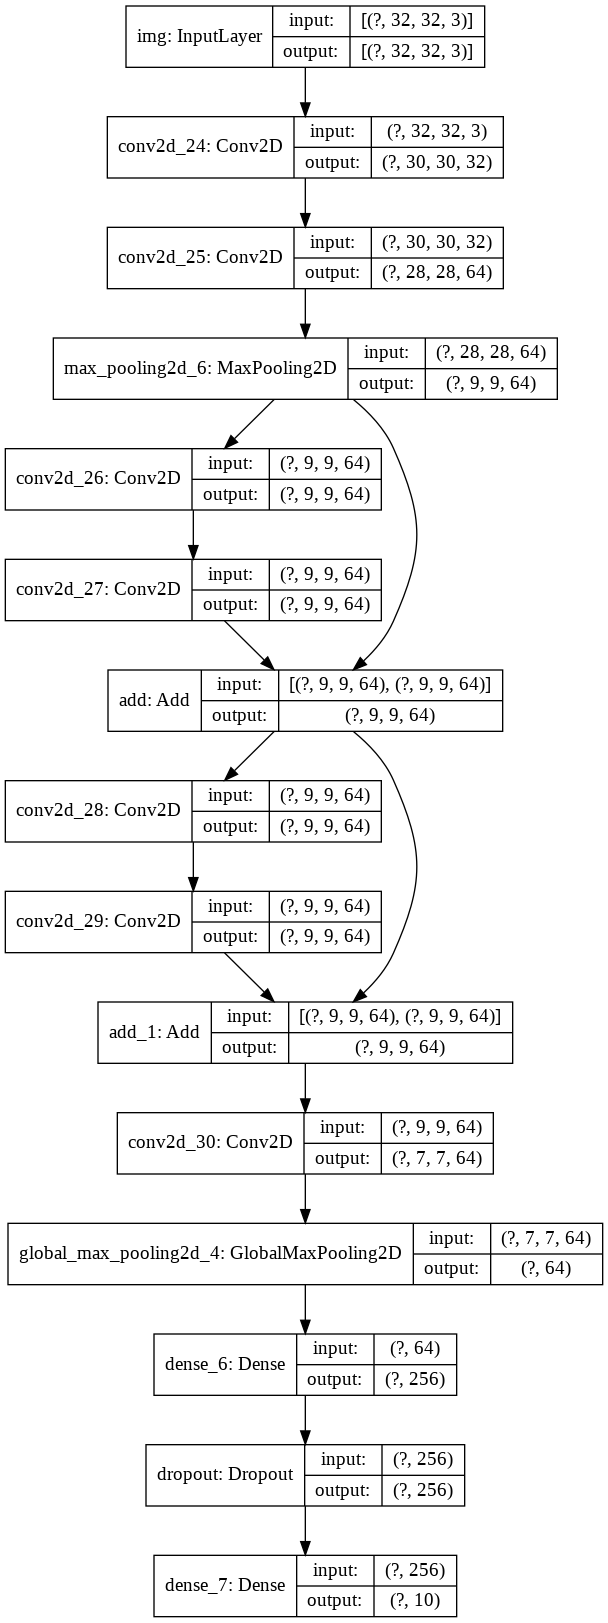

In [ ]:
inputs = keras.Input(shape=(32,32,3),name='img')
h1 = layers.Conv2D(32,3,activation='relu')(inputs)
h1 = layers.Conv2D(64,3,activation='relu')(h1)
block1_out =layers.MaxPool2D(3)(h1)
h2 = layers.Conv2D(64,3,activation='relu',padding='same')(block1_out)
h2 = layers.Conv2D(64,3,activation='relu',padding='same')(h2)
block2_out = layers.add([h2,block1_out]) #残差链接

h3 = layers.Conv2D(64, 3, activation='relu', padding='same')(block2_out)
h3 = layers.Conv2D(64, 3, activation='relu', padding='same')(h3)
block3_out = layers.add([h3, block2_out])

h4 = layers.Conv2D(64, 3, activation='relu')(block3_out)
h4 = layers.GlobalMaxPool2D()(h4)
h4 = layers.Dense(256, activation='relu')(h4)
h4 = layers.Dropout(0.5)(h4)
outputs = layers.Dense(10, activation='softmax')(h4)


model = keras.Model(inputs, outputs, name='small_resnet')  # 网络名不能有空格
model.summary()
keras.utils.plot_model(model, 'small_resnet_model.png', show_shapes=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['acc'])
model.fit(x_train, y_train,
         batch_size=64,
         epochs=10,
         validation_split=0.2)

#model.predict(x_test, batch_size=32)

Epoch 1/10
625/625 [==============================] - 206s 329ms/step - loss: 1.4130 - acc: 0.4904 - val_loss: 1.2512 - val_acc: 0.5628
Epoch 2/10
625/625 [==============================] - 208s 332ms/step - loss: 1.1626 - acc: 0.5871 - val_loss: 1.1790 - val_acc: 0.5890
Epoch 3/10
625/625 [==============================] - 207s 332ms/step - loss: 0.9937 - acc: 0.6522 - val_loss: 0.8802 - val_acc: 0.6930
Epoch 4/10
625/625 [==============================] - 207s 332ms/step - loss: 0.8809 - acc: 0.6964 - val_loss: 0.8106 - val_acc: 0.7193
Epoch 5/10
625/625 [==============================] - 208s 332ms/step - loss: 0.7950 - acc: 0.7255 - val_loss: 0.7821 - val_acc: 0.7296
Epoch 6/10
625/625 [==============================] - 207s 331ms/step - loss: 0.7242 - acc: 0.7527 - val_loss: 0.7858 - val_acc: 0.7373
Epoch 7/10
625/625 [==============================] - 207s 332ms/step - loss: 0.6691 - acc: 0.7720 - val_loss: 0.8920 - val_acc: 0.7068
Epoch 8/10
625/625 [============================

4.共享网络


---
函数式API的另一个优点是：可以使用共享层的模型。共享层是在同一模型中多次重用的层实例：它们学习与层图中的多个路径相对应的要素。
共享层通常用于编码来自相似空间的输入（例如，两个具有相似词汇的不同文本），因为它们可以在这些不同输入之间共享信息，并且可以在更少的空间上训练这种模型数据。

要在函数式API中共享图层，只需多次调用同一图层实例即可。例如，这是一个跨两个不同文本输入的共享Embedding图层：



In [2]:
share_embedding = layers.Embedding(1000, 64)

input1 = keras.Input(shape=(None,), dtype='int32')
input2 = keras.Input(shape=(None,), dtype='int32')

feat1 = share_embedding(input1)
feat2 = share_embedding(input2)

5.模型复用


---
由于函数式API中要处理的层图是静态数据结构，因此可以对其进行访问和检查。

这也意味着我们可以访问中间层（图中的“节点”）的输出，并在其他地方重用它们。这对于特征提取非常有用！

下面的一个例子是VGG16模型，其权重在ImageNet上进行了预训练：




In [4]:
import numpy as np

from tensorflow.keras.applications import VGG16
vgg16 = VGG16()
#获取中间结构输出
feature_list = [layer.output for layer in vgg16.layers]
#将其作为新模型输出
feat_ext_model = keras.Model(inputs = vgg16.input,outputs = feature_list)

img = np.random.random((1,224,224,3)).astype('float32')

#用于提取特征
ext_features = feat_ext_model


In [9]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(ext_features)

自定义网络层


---
tf.keras具有广泛的内置层。这里有一些例子：

卷积层：Conv1D，Conv2D，Conv3D，Conv2DTranspose，等。
池层：MaxPooling1D，MaxPooling2D，MaxPooling3D，AveragePooling1D，等。
RNN层：GRU，LSTM，ConvLSTM2D，等。
BatchNormalization，Dropout，Embedding，等。 如果找不到所需的内容，则可以通过创建自己的图层来扩展API。
所有层都对该Layer类进行子类化并实现：

一个call方法，指定由该层完成的计算。
一种build创建图层权重的方法（请注意，这只是一种样式约定；也可以在init函数中创建权重）。



Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
my_dense_1 (MyDense)         (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


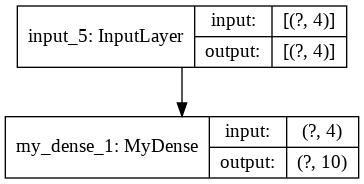

In [11]:
class MyDense(layers.Layer):
  def __init__(self,units=32):
    super(MyDense,self).__init__()
    self.units = units

  def build(self,input_shape):
    #构建权重
    self.w = self.add_weight(shape = (input_shape[-1],self.units),
                             initializer = 'random_normal',
                             trainable =True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer = 'random_normal',
                             trainable =True)
    
  def call(self,inputs):
    return tf.matmul(inputs,self.w)+ self.b  #正向传播

  
  def get_config(self):
    return {'units':self.units}  #支持序列化

# 构建模型
inputs = keras.Input((4,))
outputs = MyDense(10)(inputs)
model = keras.Model(inputs, outputs)
# 模型序列化
config = model.get_config()
new_model = keras.Model.from_config(
config, custom_objects={'MyDense':MyDense}
)
new_model.summary()
keras.utils.plot_model(new_model, 'myDense.png', show_shapes=True)

在自定义网络层调用其他网络层

构建一个rnn网络

(32, 8, 32)
(32, 8, 32)
Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(32, 10, 5)]             0         
_________________________________________________________________
conv1d (Conv1D)              (32, 8, 32)               512       
_________________________________________________________________
my_rnn (MyRnn)               (32, 8, 1)                2145      
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


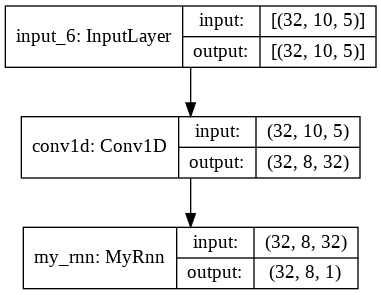

In [12]:
#超参
time_step = 10
batch_size =32
hidden_dim = 32
inputs_dim = 5
#网络
class MyRnn(layers.Layer):
  def __init__(self):
    super(MyRnn,self).__init__()
    self.hidden_dim = hidden_dim
    self.projection1 = layers.Dense(units=hidden_dim,activation='tanh')
    self.projection2 = layers.Dense(units=hidden_dim,activation='tanh')
    self.classifier = layers.Dense(1,activation='sigmoid')

  def call(self,inputs):
    outs = []
    states = tf.zeros(shape=[inputs.shape[0],self.hidden_dim])
    for t in range(inputs.shape[1]):
      x = inputs[:,t,:]
      h = self.projection1(x)
      y = h + self.projection2(states)
      states = y
      outs.append(y)

    features = tf.stack(outs,axis=1)
    print(features.shape)
    return self.classifier(features)

# 构建网络
inputs = keras.Input(batch_shape=(batch_size, time_step, inputs_dim))
x = layers.Conv1D(32, 3)(inputs)
print(x.shape)
outputs = MyRnn()(x)
model = keras.Model(inputs, outputs)
model.summary()
keras.utils.plot_model(model, 'myRnn.png', show_shapes=True)

In [13]:
rnn_model = MyRnn()
_ = rnn_model(tf.zeros((1, 10, 5)))

(1, 10, 32)


何时使用函数式API


---
如何决定是使用函数式API创建新模型，还是Model直接对类进行子类化？

通常，函数式API是更高级别的，更易于使用和更安全的构建方法，并且具有许多子类化模型不支持的功能。

但是，在创建不容易表示为有向无环图的层的模型时，模型子类化为您提供了更大的灵活性（例如，您无法使用Functional API实现Tree-RNN，您必须Model直接子类化）。


功能性API的优点如下：

下面列出的属性对于顺序模型（也是数据结构）也都是正确的，但对于子类模型（它们是Python字节码，不是数据结构）则不是正确的。

它不那么冗长。不需要__init__函数和call函数。
在定义模型时，它将验证模型。
在Functional API中，输入规范（shape和dtype）是预先创建的（通过Input），并且每次调用图层时，该图层都会检查传递给它的规范是否符合其假设。
这样可以保证使用Functional API构建的任何模型都可以运行。所有调试（与收敛相关的调试除外）将在模型构建过程中静态发生，而不是在执行时发生。这类似于在编译器中进行类型检查。
函数式模型是可绘制且可检查的。
可以将模型绘制为图形，并且可以轻松访问该图形中的中间节点-例如，以提取和重用中间层的输出。
函数式模型模型可以序列化或克隆
因为函数式模型是数据结构而不是一段代码，所以它可以安全地序列化，并且可以保存为单个文件，可以重新创建完全相同的模型，而无需访问任何原始代码。
功能性API的缺点如下：

它不支持动态架构。

Functional API将模型视为层的DAG。对于大多数深度学习架构（但不是全部），这是正确的：但是，递归网络或Tree RNN不遵循此假设，并且无法在Functional API中实现。
有时，需要从头开始编写所有内容。

在编写高级体系结构时，可能想做“定义层的DAG”范围之外的事情：例如，可能需要在模型实例上公开多个自定义训练和推理方法。这需要子类化。

